Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Carregamento de dados

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Explorando e categorizando os dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Visualizando os tipos de roupas com escala de cor

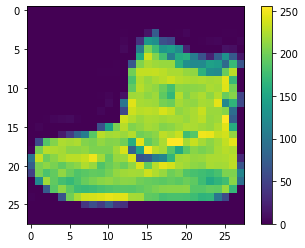

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
plt.imshow(imagens_treino[0])
plt.colorbar()

Criando o modelo

In [12]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), #20% de dormência para os Neurônios 
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 107us/sample - loss: 3.4443 - acc: 0.6505 - val_loss: 0.7387 - val_acc: 0.7372
Epoch 2/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.8030 - acc: 0.7170 - val_loss: 0.6538 - val_acc: 0.7819
Epoch 3/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.7519 - acc: 0.7264 - val_loss: 0.6048 - val_acc: 0.7841
Epoch 4/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.7368 - acc: 0.7367 - val_loss: 0.5403 - val_acc: 0.8018
Epoch 5/5
48000/48000 [==============================] - 5s 102us/sample - loss: 0.7225 - acc: 0.7428 - val_loss: 0.5894 - val_acc: 0.7866


Salvando e carregando o modelo treinado

In [0]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visuzalizando as acurácias de treino e validação por época

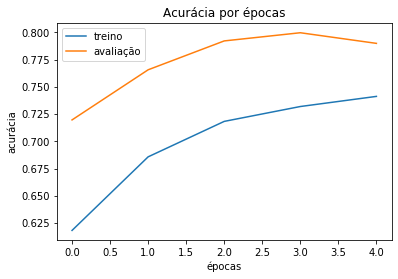

In [7]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])

Visuzalizando as perdas de treino e validação por época

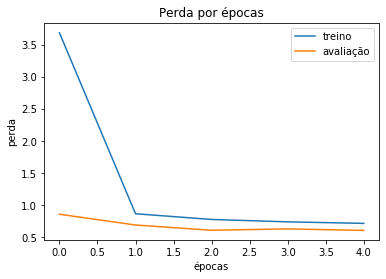

In [8]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])

Teste de modelo

In [9]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo:  2
número da imagem de teste: 2


Avaliação de modelo

In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.6388 - acc: 0.7809
Perda do teste:  0.6388404048919678
Acurácia do teste:  0.7809
